In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
alzhemers= pd.read_csv('alzheimers_disease_data.csv')

In [3]:
alzhemers.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
alzhemers.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [5]:
alzhemers.shape

(2149, 35)

In [6]:
alzhemers.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
new= alzhemers.drop(columns='PatientID', axis=1)
new= new.drop(columns='DoctorInCharge',axis=1)
new.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [8]:
new.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print(new.isnull())

        Age  Gender  Ethnicity  EducationLevel    BMI  Smoking  \
0     False   False      False           False  False    False   
1     False   False      False           False  False    False   
2     False   False      False           False  False    False   
3     False   False      False           False  False    False   
4     False   False      False           False  False    False   
...     ...     ...        ...             ...    ...      ...   
2144  False   False      False           False  False    False   
2145  False   False      False           False  False    False   
2146  False   False      False           False  False    False   
2147  False   False      False           False  False    False   
2148  False   False      False           False  False    False   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0                  False             False        False         False  ...   
1                  False             False        F

<Axes: >

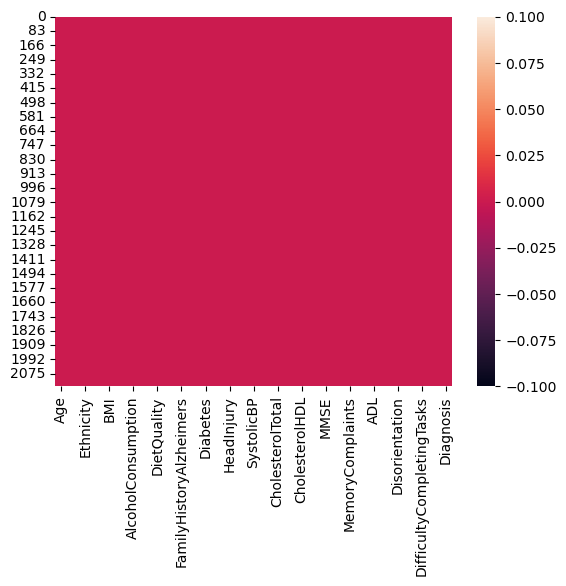

In [10]:
sns.heatmap(new.isnull())

Negative (0): 1389
Positive (1): 760


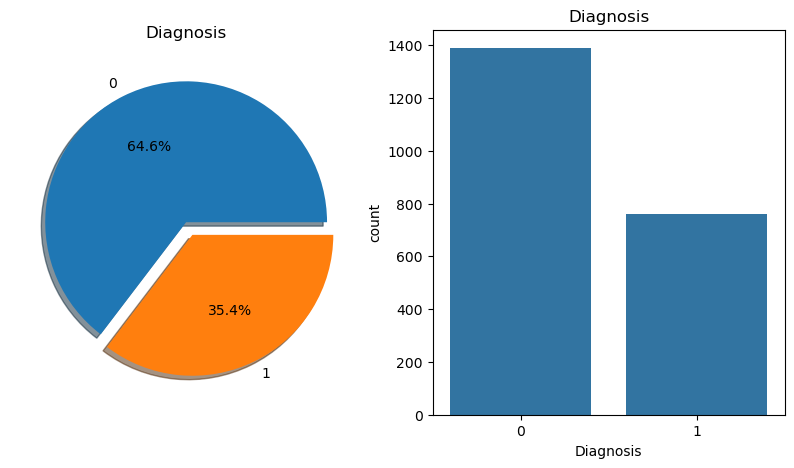

In [11]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
diagnosis_counts = new['Diagnosis'].value_counts()
diagnosis_counts.plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('')
sns.countplot(x='Diagnosis', data=new, ax=ax[1])
ax[1].set_title('Diagnosis')
N, P = diagnosis_counts
print('Negative (0):', N)
print('Positive (1):', P)

In [12]:
print(new.corr())

                                Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.007528   
Diabetes    

<Axes: >

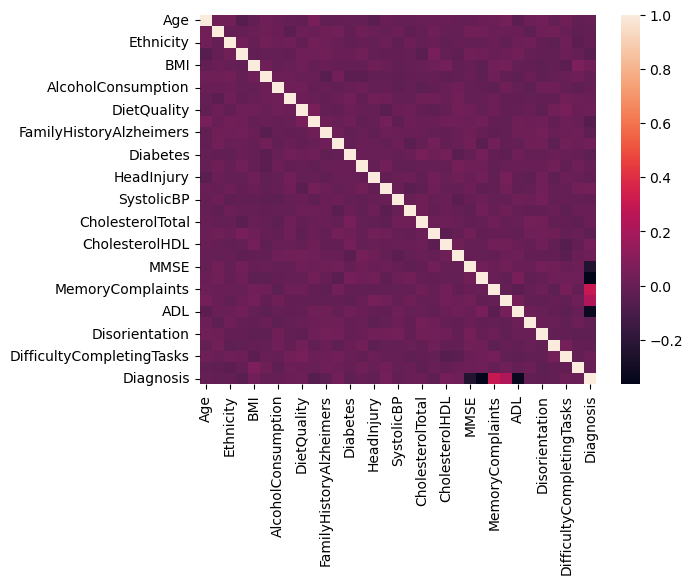

In [13]:
sns.heatmap(new.corr())

In [14]:
new['Diagnosis'].shape

(2149,)

In [15]:
new['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [16]:
x= new.drop(columns='Diagnosis',axis=1)
y=new['Diagnosis']

In [17]:
print(x)

      Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524   

In [18]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64


In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(2149, 32) (1504, 32) (645, 32)


In [21]:
print(y.shape,y_train.shape,y_test.shape)

(2149,) (1504,) (645,)


In [22]:
model= LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
prediction= model.predict(x_test)
print(prediction)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [24]:
accuracy= accuracy_score(prediction,y_test)
print(accuracy)

0.7891472868217054


In [25]:
import pickle
pickle.dump(model,open('brain.pkl','wb'))